<a href="https://colab.research.google.com/github/ragedharb16/sales-predictions/blob/main/Raged_project_1_part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



##Raged project



This Project is about identefy the sales in this outlets and to predicto and improve better results 

Here is the Data Dictionary for this dataset:

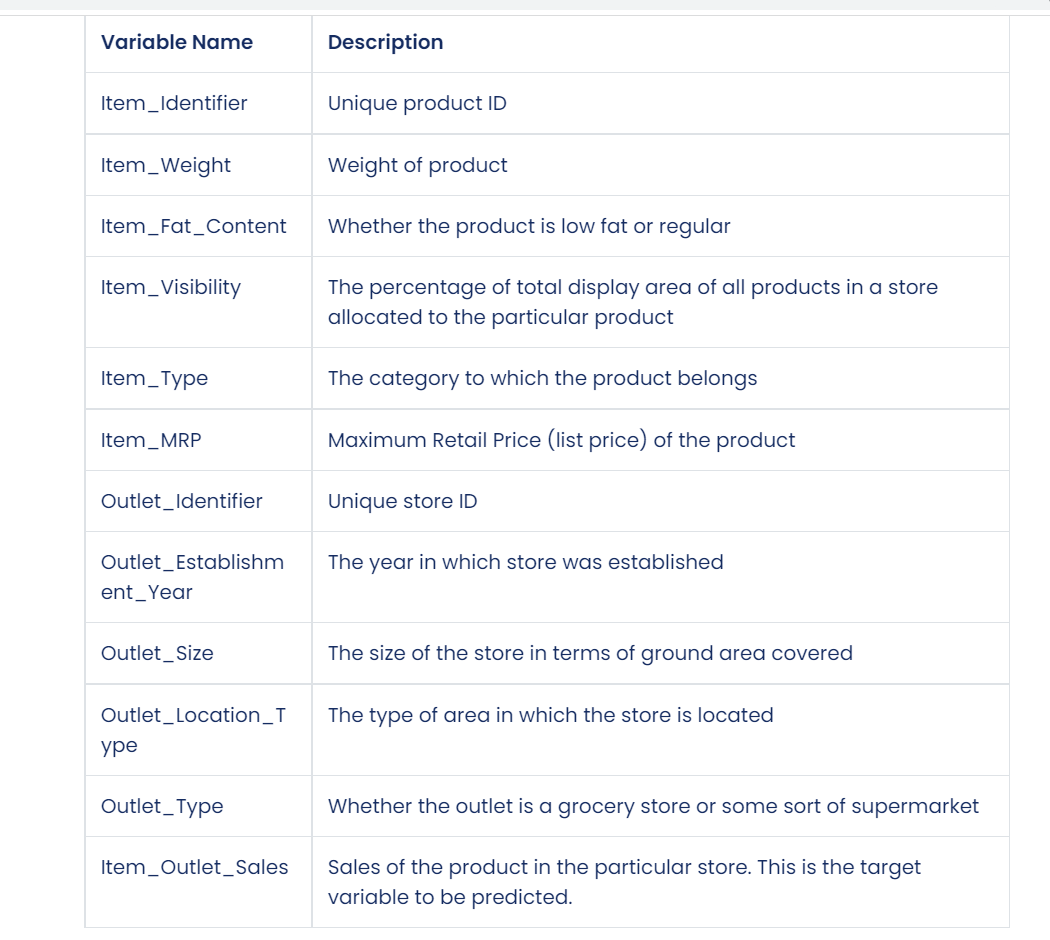

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import set_config
set_config(display="diagram")
dataframe="/content/sales_predictions.csv"
df= pd.read_csv(dataframe)
df.shape

(8523, 12)

#DATA FRAME

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#Cleaning data

In [5]:
df.duplicated(keep="first").sum()


0

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#filling Missing values

In [7]:
df["Item_Weight"].value_counts(dropna=False).mean()

20.48798076923077

In [8]:
df["Item_Weight"].fillna(value=20.48, inplace=True) 
# the mean of item weight whas that number so to no damange the high or low we put that one

In [9]:
df["Outlet_Size"].fillna(value="Not apply", inplace=True) 
#  size dosent apply to a fruit

In [10]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Not apply,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Not apply,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [11]:
df.Item_Identifier.isnull().sum()

0

In [12]:
df.Outlet_Size.isnull().sum()

0

In [13]:
df.Item_Weight.value_counts()

20.480    1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [14]:
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [15]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
df.Item_Outlet_Sales.value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [17]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].str.replace("LF", "Low Fat")
df["Item_Fat_Content"]=df["Item_Fat_Content"].str.replace("reg", "Regular")
df["Item_Fat_Content"]=df["Item_Fat_Content"].str.replace("low fat", "Low Fat")          

In [18]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [19]:
df.Item_Fat_Content.value_counts(dropna=False,normalize=True).round(2)

Low Fat    0.65
Regular    0.35
Name: Item_Fat_Content, dtype: float64

In [20]:
df.loc[:].describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,14.166047,0.066132,140.992782,1997.831867,2181.288914
std,5.110996,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,14.500000,0.053931,143.012800,1999.000000,1794.331000
75%,19.500000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [21]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [22]:
data_type= df.dtypes
str_cols=data_type[data_type=="object"]
str_cols.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

#Visualisation

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

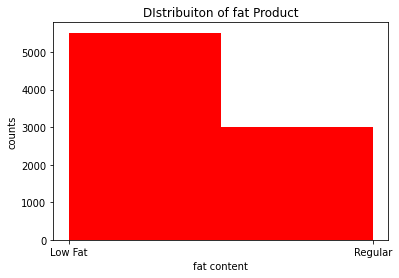

In [24]:
plt.hist(df.Item_Fat_Content, color="Red", bins=2)
plt.xlabel("fat content")
plt.ylabel("counts")
plt.title("DIstribuiton of fat Product");

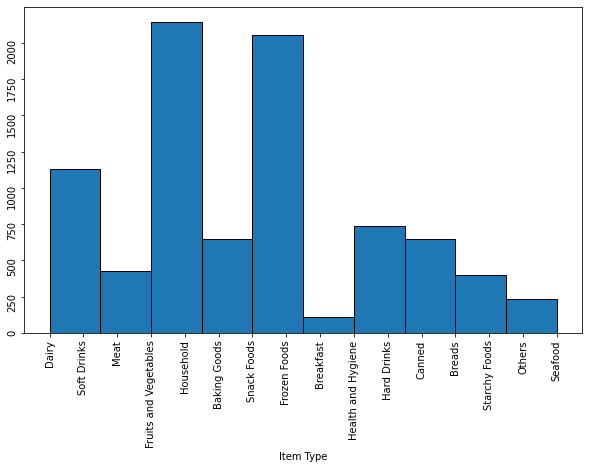

In [25]:
df["Item_Type"].value_counts()
plt.figure(figsize=(10,6))
plt.hist(df.Item_Type, edgecolor="Black")
plt.xlabel("Item Type",)
sns.set_context(context=None, font_scale=10, rc=None)
plt.xticks()
plt.tick_params(labelrotation=90)

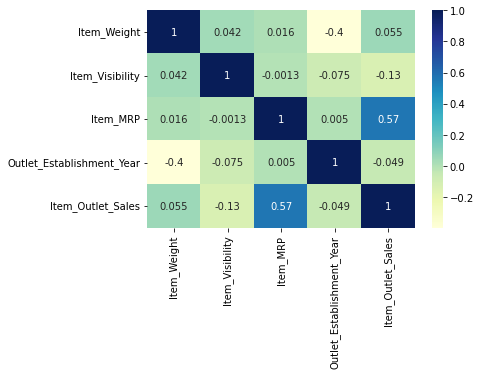

In [26]:
corr=df.corr()
sns.heatmap(corr,cmap="YlGnBu", annot=True);

In [27]:
# lowfat=df.loc[df["Item_Fat_Content"]=="Low Fat"]
# itemdiary= df.loc[df["Item_Type"]=="Diary"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


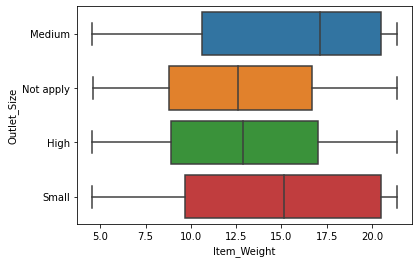

In [28]:
sns.boxplot("Item_Weight","Outlet_Size",data=df);

here we can see the size of the profuct compare to there weight

Text(0.5, 1.0, 'Outlet Sales By Type of Market ')

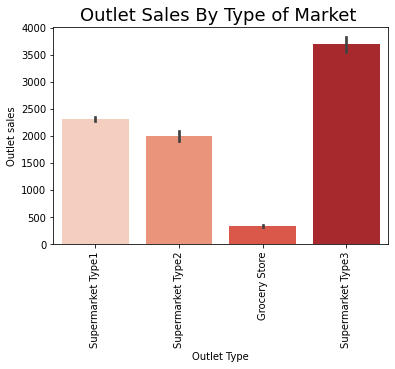

In [29]:
sns.barplot(x="Outlet_Type",y="Item_Outlet_Sales",palette="Reds",data=df);
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlabel("Outlet Type")
plt.xticks(rotation=90)
plt.ylabel("Outlet sales");
plt.title("Outlet Sales By Type of Market ", fontsize=18)

we can see Here the Outlet sales they are bigger in the type No3 of the supermarket

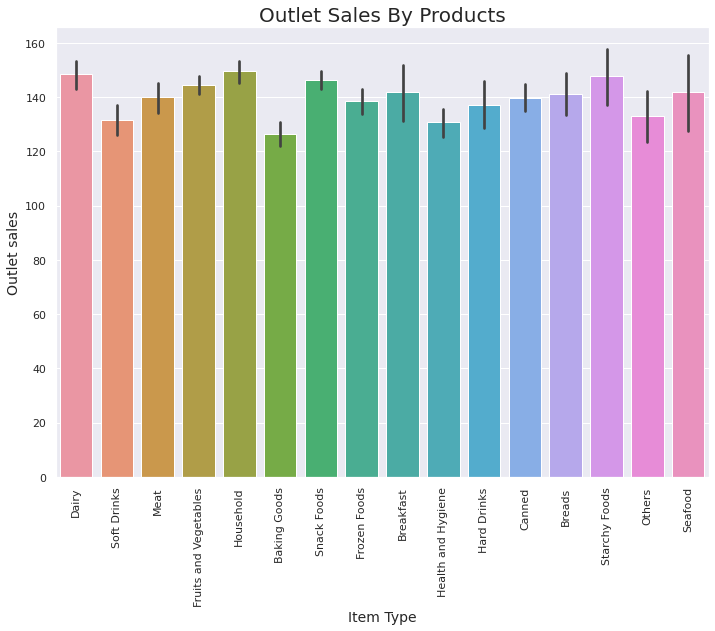

In [30]:
sns.barplot(x="Item_Type",y="Item_MRP", data=df)

sns.set(rc={'figure.figsize':(12.7,8.27)})
plt.xlabel("Item Type",fontsize=14)
plt.ylabel("Outlet sales", fontsize=14)
plt.xticks(rotation=90);
plt.title("Outlet Sales By Products", fontsize=20);

In [31]:
sort=df.groupby(["Item_Type"])["Item_MRP"].mean()

In [32]:
sort2= sort.sort_values()

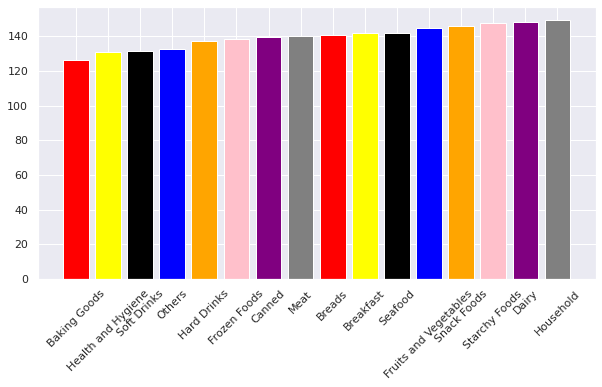

In [33]:
plt.figure(figsize=(10,5))
c= ['red', 'yellow', 'black', 'blue', 'orange', 'pink', 'purple', 'gray', 'red', 'yellow', 'black', 'blue', 'orange', 'pink', 'purple', 'gray']
plt.bar(sort2.index, sort2.values, color= c)
plt.xticks(rotation=45);

the sales they are almost equal in every itemm 

In [34]:
df["Item_Weight"].describe()

count    8523.000000
mean       14.166047
std         5.110996
min         4.555000
25%         9.310000
50%        14.500000
75%        19.500000
max        21.350000
Name: Item_Weight, dtype: float64

In [35]:
light= df.loc[df.Item_Weight <=9.0].count()[0]
medium= df.loc[(df.Item_Weight >9.0) & (df.Item_Weight <19.5)].count()[0]
heavy = df.loc[df.Item_Weight > 19.5].count()[0]
# light
# filters ready to make our pie

In [36]:
pie =[light, medium, heavy]
labels=["less then 9.0 lb", "between 9 and 19.5lb","More then 19.5"]

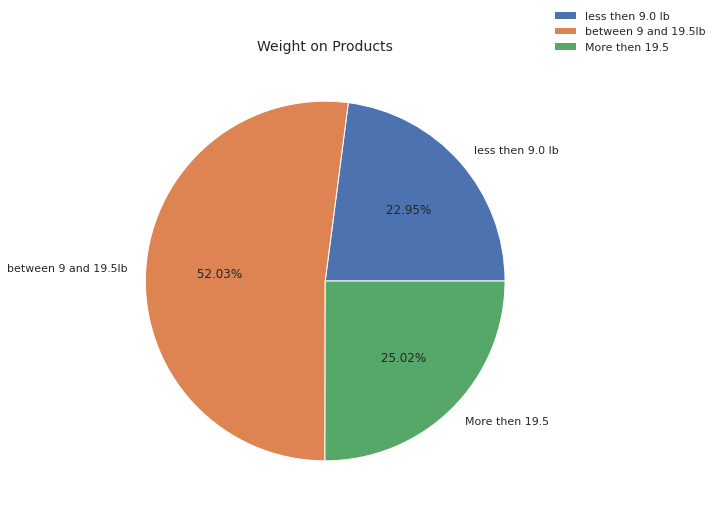

In [37]:
plt.pie(pie,labels=labels,autopct='% .2f%%')
plt.style.use("seaborn")
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.legend(loc=(1,1))
plt.title("Weight on Products", fontsize=14);

this is the porcentage of the products by Weight that could be i help in cost of Transportation

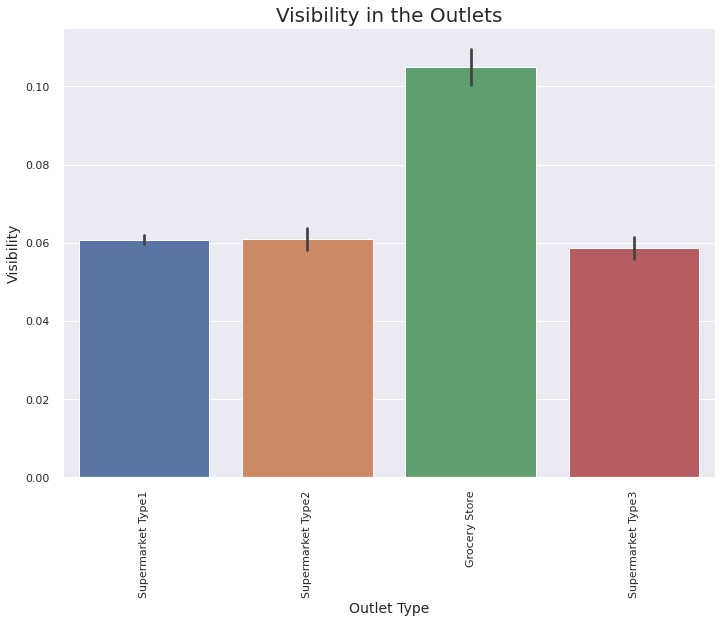

In [87]:
sns.barplot(x="Outlet_Type",y="Item_Visibility", data=df)
sns.set(rc={'figure.figsize':(12.7,8.27)})
plt.xlabel("Outlet Type",fontsize=14)
plt.ylabel("Visibility", fontsize=14)
plt.xticks(rotation=90);
plt.title("Visibility in the Outlets", fontsize=20);

In [99]:
dfinfo= df.copy()
dfinfo= df.groupby("Item_Type")["Item_MRP"].sum().sort_values(ascending=False)
dfinfo

Item_Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9204
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4596
Canned                    90706.7270
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1650
Breads                    35379.1198
Hard Drinks               29334.6766
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: Item_MRP, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


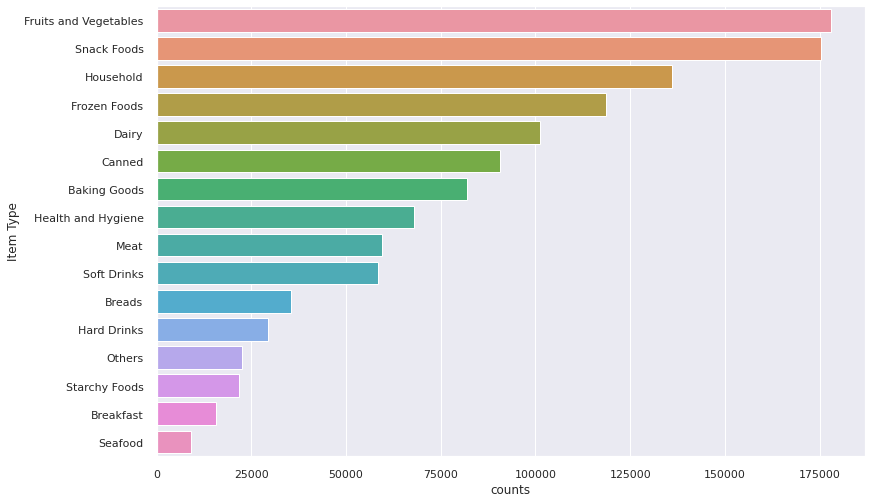

In [104]:
sns.barplot(dfinfo, x=dfinfo, y= dfinfo.index)
plt.xlabel("counts")
plt.ylabel("Item Type");

#Machine Learning

In [39]:
X= df.drop(columns=["Item_Outlet_Sales","Item_Identifier"])
y= df["Item_Outlet_Sales"]
# im dowloading again the original data since we clean the data in other assigments

In [40]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)
# splinting the data help to avoin leakage

In [41]:
# step 1 selectors; to separate the object for the numbers and treat diferents
# since one we scaled and the other encorder
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display="diagram")
# librarys on 

In [43]:
# simple imputers that the median in the numbers that way is going to find the medium in the data an fillna with that
# the most frequent in the categorical since we nned the Fillna with the most comun to not contamined too much our data
median_imputer = SimpleImputer(strategy='median')
freq_imputer = SimpleImputer(strategy='most_frequent')
scaler=StandardScaler()
ohe= OneHotEncoder(sparse=False, handle_unknown="ignore")

In [44]:
# 2 pipelines to its like a superfunctions
procesador= make_pipeline(median_imputer,scaler)
procesador2=make_pipeline(freq_imputer,ohe)
procesador

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [45]:
procesador2

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [46]:
# 2 tuples to put our pipele and the data together 
num_tuple = (procesador, num_selector)
cat_tuple = (procesador2, cat_selector)
# the make column is to put the tuples in new columns
columnfinal= make_column_transformer(cat_tuple, num_tuple, remainder="passthrough")
columnfinal

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa88ba59990>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa88ba59950>)])

In [47]:
dummy= DummyRegressor(strategy="mean")

In [48]:
dummypipe= make_pipeline(columnfinal,dummy)

In [49]:
dummypipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa88ba59990>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa88ba59950>)])),
                ('dummyregressor', DummyRegressor())])

In [50]:
def predictons(true, pred):
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE: {mae:,.2f} \n MSE: {mse:,.2f} \n RMSE: {rmse:,.2f} \n R2: {r2:,.2f} ')

In [51]:
print("train score dummy values BASELINE")
predictons(y_train, dummypipe.predict(X_train))
print("\nTest score is")
predictons(y_test, dummypipe.predict(X_test))
print("Test score is")

train score dummy values BASELINE
MAE: 1,360.22 
 MSE: 2,959,455.70 
 RMSE: 1,720.31 
 R2: 0.00 

Test score is
MAE: 1,326.12 
 MSE: 2,772,144.46 
 RMSE: 1,664.98 
 R2: -0.00 
Test score is


In [52]:
# this one is to put our data into our train
columnfinal.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa88ba59990>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa88ba59950>)])

In [53]:
# this is the ende of the data
columnfinaloutput= columnfinal.transform(X_train)
columnfinaloutput2= columnfinal.transform(X_test)

In [54]:
# making a pipeline to our linear regression
superpipe = make_pipeline(columnfinal, LinearRegression())

In [55]:
# fitting the pipe
superpipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa88ba59990>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa88ba59950>)])),
                ('linearregression', LinearRegression())])

In [56]:
# taking the score
train_score = superpipe.score(X_train, y_train)
test_score = superpipe.score(X_test, y_test)
print(train_score)
print(test_score)

0.5594979853275022
0.5672933962540003


In [57]:
# taking the prediccionts
reg_preds = superpipe.predict(X_train)
reg_predstest = superpipe.predict(X_test)

In [58]:
# manually imputing the mean absolute error(MAE)
mae_train = mean_absolute_error(y_train, reg_preds)
mae_test = mean_absolute_error(y_test, reg_predstest)
print(f"score for the absolute error in the train is: {mae_train:,.2f}")
print(f"score for the absolute error in the test is:{mae_test:,.2f}")

score for the absolute error in the train is: 848.81
score for the absolute error in the test is:804.65


In [59]:
# manually imputing the Coefficient of Determination (r^2)
r2_trainreg = r2_score(y_train, reg_preds)
r2_testregtest = r2_score(y_test, reg_predstest)
print(f"the Coefficient of Determination (r^2) using the regression(training) is: {r2_trainreg:,.2f}")
print(f"the Coefficient of Determination (r^2) using the regression(testing) is: {r2_testregtest:,.2f}")

the Coefficient of Determination (r^2) using the regression(training) is: 0.56
the Coefficient of Determination (r^2) using the regression(testing) is: 0.57


In [60]:
# manually imputing the mean squared error using the regression(MSE)
mse= mean_squared_error(y_train, reg_preds)
mset= mean_squared_error(y_test,reg_predstest)
print(f"the mean squared error using the regression(training) is: {mse:,.2f}")
print(f"the mean squared error using the regression(testing) is: {mset:,.2f}")

the mean squared error using the regression(training) is: 1,303,646.20
the mean squared error using the regression(testing) is: 1,193,827.69


In [61]:
# manually imputing the root mean squared error using the regression (RMSE)
rmse= np.sqrt(mean_squared_error(y_train, reg_preds))
rmset= np.sqrt(mean_squared_error(y_test,reg_predstest))
print(f"the root mean squared error using the regression(training) is: {rmse:,.2f}")
print(f"the root squared error using the regression(testing) is: {rmset:,.2f}")

the root mean squared error using the regression(training) is: 1,141.77
the root squared error using the regression(testing) is: 1,092.62


In [62]:
print('Train Evaluation')

predictons(y_train, superpipe.predict(X_train))

print('\n Test Evaluation')

predictons(y_test, superpipe.predict(X_test))

Train Evaluation
MAE: 848.81 
 MSE: 1,303,646.20 
 RMSE: 1,141.77 
 R2: 0.56 

 Test Evaluation
MAE: 804.65 
 MSE: 1,193,827.69 
 RMSE: 1,092.62 
 R2: 0.57 


In [63]:
# deccision tree function 
dec_tree = DecisionTreeRegressor(random_state = 42)

In [64]:
# pipeline to the decision tree
pipelinetree= make_pipeline(columnfinal, dec_tree)
pipelinetree

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa88ba59990>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa88ba59950>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [65]:
# pipeline of the decission tree
pipelinetree.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa88ba59990>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa88ba59950>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [66]:
# making the predictions
dec_pred= pipelinetree.predict(X_train)
dec_predt= pipelinetree.predict(X_test)

In [67]:
# making the score
train_score_tree = pipelinetree.score(X_train, y_train)
test_score_tree = pipelinetree.score(X_test, y_test)
print(train_score_tree)
print(test_score_tree)

1.0
0.18314888227129988


In [68]:
pipelinetree.get_params()

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa88ba59990>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                      

In [69]:
# just trying to find the best score
dec_tree_10 = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dec_tree_10.fit(columnfinaloutput, y_train)
train_10_score = dec_tree_10.score(columnfinaloutput, y_train)
test_10_score = dec_tree_10.score(columnfinaloutput2, y_test)
print(train_10_score)
print(test_10_score)

0.6151601084604439
0.5823601122589671


In [70]:
# loop to find the best score
max_depth_range = list(range(2, 80))
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(columnfinaloutput, y_train)
    score = dec_tree.score(columnfinaloutput2, y_test)
    r2.append(score)

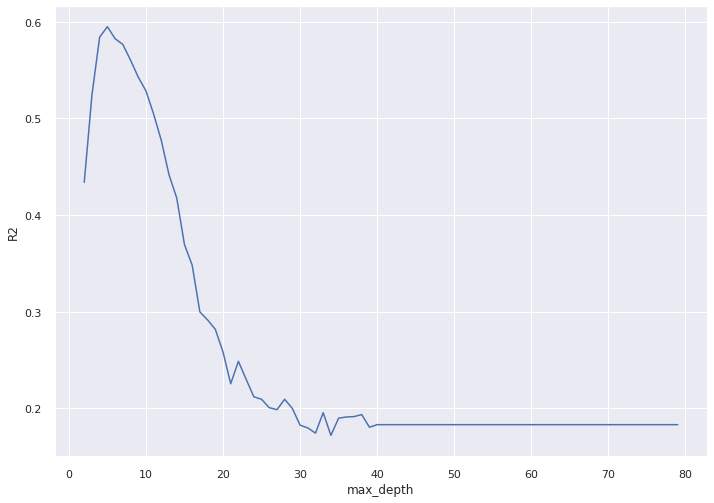

In [71]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [72]:
dec_tree_5 = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dec_tree_5.fit(columnfinaloutput, y_train)
train_5_score = dec_tree_5.score(columnfinaloutput, y_train)
test_5_score = dec_tree_5.score(columnfinaloutput2, y_test)
print(train_5_score)
print(test_5_score)
# the best score we had

0.6151601084604439
0.5823601122589671


In [73]:
rf = RandomForestRegressor(random_state = 42)

In [74]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [75]:
rfpipeline =make_pipeline(columnfinal,rf)
rfpipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa88ba59990>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa88ba59950>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [76]:
rfpipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa88ba59990>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa88ba59950>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [77]:
rf_train_score = rfpipeline.score(X_train, y_train)
rf_test_score = rfpipeline.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9382190949871994
0.5587307527377559


In [78]:
rfpipeline.predict(X_test)

array([ 673.516622,  915.754636,  752.347342, ..., 3857.438802,
       2142.371292, 2337.52393 ])

In [79]:
[estimator.get_depth() for estimator in rf.estimators_]

[33,
 33,
 40,
 30,
 36,
 41,
 33,
 36,
 32,
 34,
 35,
 38,
 33,
 35,
 33,
 30,
 38,
 35,
 32,
 39,
 32,
 36,
 34,
 34,
 33,
 37,
 39,
 33,
 33,
 35,
 35,
 35,
 35,
 31,
 34,
 31,
 38,
 38,
 35,
 32,
 34,
 35,
 35,
 31,
 33,
 35,
 35,
 37,
 34,
 31,
 36,
 41,
 33,
 38,
 34,
 32,
 35,
 34,
 30,
 34,
 34,
 34,
 31,
 37,
 36,
 34,
 35,
 32,
 31,
 34,
 37,
 33,
 40,
 33,
 31,
 33,
 36,
 33,
 39,
 34,
 37,
 30,
 37,
 35,
 36,
 38,
 34,
 38,
 36,
 34,
 36,
 32,
 32,
 33,
 34,
 31,
 34,
 33,
 34,
 42]

In [80]:
# just trying
rf_300 = RandomForestRegressor(n_estimators = 5, random_state = 42)
rf_300 = make_pipeline(columnfinal,rf_300)
rf_300.fit(X_train, y_train)
rf300_train_score = rf_300.score(X_train, y_train)
rf300_test_score = rf_300.score(X_test, y_test)
print(rf300_train_score)
print(rf300_test_score)

0.8980277323616225
0.4962948735892888


In [81]:
# loop taking for clases 
depths = range(1, 20, 2)

r2_train = []
r2_test = []
#loop over the values in depths
for n in depths:
  #Trying depth. Printing depth = n
  #fit a new model with max_depth=n
  rf_2 = RandomForestRegressor(max_depth=n, random_state=42)

  #put the model into a pipeline
  rf_2_pipe = make_pipeline(columnfinal, rf_2)
  
  #fit the model
  rf_2_pipe.fit(X_train, y_train)
  
  #create prediction arrays
  train_pred = rf_2_pipe.predict(X_train)
  test_pred = rf_2_pipe.predict(X_test)
  
  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)
  r2_train.append(train_r2score)
  r2_test.append(test_r2score)

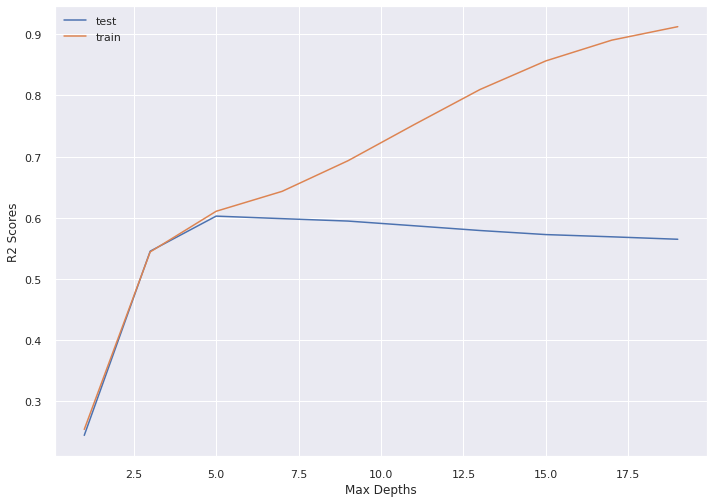

In [82]:
# plot taking for clase
plt.plot(depths, r2_test, label = 'test')
plt.plot(depths, r2_train, label = 'train')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend();

In [83]:
# Inputing the best score
bestpipe = make_pipeline(columnfinal, RandomForestRegressor(random_state=42, max_depth = 5))

bestpipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa88ba59990>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fa88ba59950>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=5, random_state=42))])

In [84]:
# using the functions
print('Random Forest Train Evaluation')
predictons(y_train, bestpipe.predict(X_train))

print('\nRandom Forest Test Evaluation')
predictons(y_test, bestpipe.predict(X_test)) 

Random Forest Train Evaluation
MAE: 755.40 
 MSE: 1,152,595.69 
 RMSE: 1,073.59 
 R2: 0.61 

Random Forest Test Evaluation
MAE: 728.41 
 MSE: 1,096,375.02 
 RMSE: 1,047.08 
 R2: 0.60 


The best score so far that we have is in the random forest